## COVID-19 DATASET - PREDICTING DEATHS
* Province_State - The name of the State within the USA.
* Country_Region - The name of the Country (US).
* Last_Update - The most recent date the file was pushed.
* Lat - Latitude.
* Long_ - Longitude.
* Confirmed - Aggregated confirmed case count for the state.
* Deaths - Aggregated Death case count for the state.
* Recovered - Aggregated Recovered case count for the state.
* Active - Aggregated confirmed cases that have not been resolved (Active = Confirmed - Recovered - Deaths).
* FIPS - Federal Information Processing Standards code that uniquely identifies counties within the USA.
* Incident_Rate - confirmed cases per 100,000 persons.
* People_Tested - Total number of people who have been tested.
* People_Hospitalized - Total number of people hospitalized.
* Mortality_Rate - Number recorded deaths * 100/ Number confirmed cases.
* UID - Unique Identifier for each row entry.
* ISO3 - Officialy assigned country code identifiers.
* Testing_Rate - Total number of people tested per 100,000 persons.
* Hospitalization_Rate - Total number of people hospitalized * 100/ Number of confirmed cases.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
df = pd.read_csv("D:/STUDIES/DATA TRAINED/DATASETS/EVALUATION_WEEK_2/csse_covid_19_daily_reports_us.csv")
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [5]:
# change the date format
df['Last_Update'] = pd.to_datetime(df['Last_Update'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Province_State        58 non-null     object        
 1   Country_Region        58 non-null     object        
 2   Last_Update           58 non-null     datetime64[ns]
 3   Lat                   56 non-null     float64       
 4   Long_                 56 non-null     float64       
 5   Confirmed             58 non-null     int64         
 6   Deaths                58 non-null     int64         
 7   Recovered             42 non-null     float64       
 8   Active                58 non-null     float64       
 9   FIPS                  58 non-null     int64         
 10  Incident_Rate         56 non-null     float64       
 11  People_Tested         56 non-null     float64       
 12  People_Hospitalized   33 non-null     float64       
 13  Mortality_Rate        

In [6]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,2712.800274,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


* A highest of 28636 DEATHS were recorded in a state on the day
* A highest of 354370 CASES were recorded in a state on the day
* A highest of 76410 People were hospitalized in a state on the day

In [7]:
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

* Lat and Long_ can be filled based on the place
* Recovered = Confirmed + Deaths - Active
* Inceident_Rate, People_Tested and Testing_Rate can be filled using the mean
* People_Hospitalized and Hospitalization_Rate can be filled using other categories
* Mortality_Rate = Deaths*100/Confirmed

##### Filling null values for Recovered

In [8]:
df['Recovered'] = df['Confirmed'] + df['Deaths'] - df['Active']
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,1044.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,372.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,0.0,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,5267.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,4066.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


##### Filling null values for Lat, Long_

In [9]:
df[df['Lat'].isnull()]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,0.0,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN
13,Grand Princess,US,2020-05-21 02:32:54,NaN,NaN,103,3,6.0,100.0,99999,NaN,NaN,NaN,2.912621,84099999,USA,NaN,NaN


* Missing values in Lat and Long are for two cruise ships, they were both on cruise and stranded on the sea after the outbreak
* They also contain the only two missing values for columns Inceident_Rate, People_Tested and Testing_Rate
* So these two rows can be deleted from the dataframe

In [10]:
df.drop(df[df['Lat'].isnull()].index,axis=0,inplace=True)
df.reset_index(inplace=True,drop=True)

##### Filling null values for Mortality_Rate

In [11]:
df[df['Mortality_Rate'].isnull()]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
2,American Samoa,US,2020-05-21 02:32:54,-14.271,-170.132,0,0,0.0,0.0,60,0.0,124.0,NaN,NaN,16,ASM,222.857246,NaN


* Since there are no cases mortality rrate is 0

In [12]:
df['Mortality_Rate'].fillna(0, inplace = True)

##### Filling null values for People_Hospitalized and Hospitalization_Rate

In [13]:
df[df['People_Hospitalized'].isnull()]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,372.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,0.0,0.0,60,0.000000,124.0,NaN,0.000000,16,ASM,222.857246,NaN
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,6994.0,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,4585.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,District of Columbia,US,2020-05-21 02:32:54,38.8974,-77.0268,7551,407,1873.0,6085.0,11,1069.927127,40419.0,NaN,5.390015,84000011,USA,5727.106946,NaN
12,Guam,US,2020-05-21 02:32:54,13.4443,144.7937,154,5,135.0,24.0,66,93.771502,4972.0,NaN,3.246753,316,GUM,3027.479921,NaN
15,Illinois,US,2020-05-21 02:32:54,40.3495,-88.9861,100418,4525,9050.0,95893.0,17,792.451219,642713.0,NaN,4.506164,84000017,USA,5071.986102,NaN
17,Iowa,US,2020-05-21 02:32:54,42.0115,-93.2105,15620,393,9148.0,6865.0,19,495.076179,110748.0,NaN,2.516005,84000019,USA,3510.159838,NaN
20,Louisiana,US,2020-05-21 02:32:54,31.1695,-91.8678,35316,2608,31465.0,6459.0,22,759.680898,285970.0,NaN,7.384755,84000022,USA,6151.487891,NaN
24,Michigan,US,2020-05-21 02:32:54,43.3266,-84.5361,53009,5060,38354.0,19715.0,26,530.787614,437072.0,NaN,9.545549,84000026,USA,4376.471997,NaN


<AxesSubplot:xlabel='Hospitalization_Rate', ylabel='Mortality_Rate'>

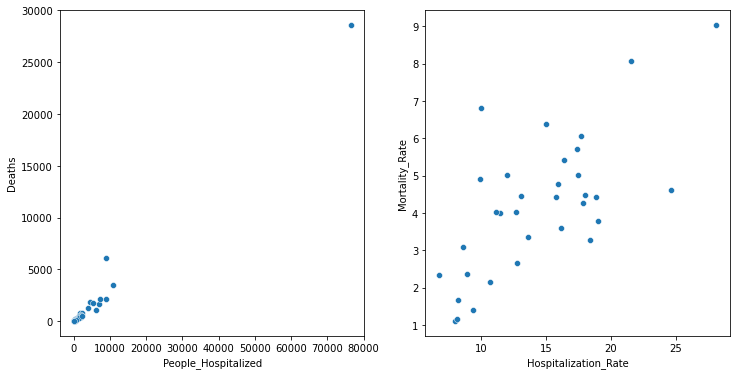

In [14]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(x=df['People_Hospitalized'],y=df['Deaths'])
plt.subplot(1,2,2)
sns.scatterplot(x=df['Hospitalization_Rate'],y=df['Mortality_Rate'])

In [15]:
df[['People_Hospitalized','Deaths']].corr()

,People_Hospitalized,Deaths
People_Hospitalized,1.000000,0.992313
Deaths,0.992313,1.000000


In [16]:
df[['Hospitalization_Rate','Mortality_Rate']].corr()

,Hospitalization_Rate,Mortality_Rate
Hospitalization_Rate,1.000000,0.687832
Mortality_Rate,0.687832,1.000000


* Since Hospitalization and death have high correlation, we can fill the null values using Deaths column

To Fill null values we can group deaths into bins

In [17]:
pd.qcut(df['Deaths'], q=10).value_counts()

(4027.0, 28636.0]    6
(1056.0, 1864.0]     6
(400.0, 570.0]       6
(131.5, 299.0]       6
(13.5, 69.0]         6
(-0.001, 13.5]       6
(1864.0, 4027.0]     5
(570.0, 1056.0]      5
(299.0, 400.0]       5
(69.0, 131.5]        5
Name: Deaths, dtype: int64

In [18]:
bins = [-0.01,13.5,69.0,131.5,299.0,400.0,570.0,1056.0,1864.0,4027.0,28636.0]
group_names = [0,1,2,3,4,5,6,7,8,9]
df['death-range'] = pd.cut(df['Deaths'],bins,labels=group_names)
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,death-range
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,1044.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860,5
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,372.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN,0
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,0.0,0.0,60,0.000000,124.0,NaN,0.000000,16,ASM,222.857246,NaN,0
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,5267.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005,6
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,4066.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584,2


In [19]:
df[['death-range',"People_Hospitalized"]].groupby(['death-range']).mean()

,People_Hospitalized
death-range,
0,74.0
1,155.5
2,403.0
3,782.0
4,1762.5
5,1697.0
6,2050.0
7,5341.6
8,9091.0


In [20]:
df['People_Hospitalized'] = df.groupby(['death-range'])["People_Hospitalized"].transform(lambda x: x.fillna(int(x.mean())))
df['Hospitalization_Rate'] = df['People_Hospitalized']*100/df['Confirmed']

* Since American Samoa has no cases the hospitalization will also be 0

In [21]:
df.loc[2,'People_Hospitalized']=0
df.loc[2,'Hospitalization_Rate']=0
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,death-range
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,1044.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860,5
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,372.0,39.0,2,54.815493,37045.0,74.0,2.493766,84000002,USA,5063.940017,18.453865,0
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,0.0,0.0,60,0.000000,124.0,0.0,0.000000,16,ASM,222.857246,0.000000,0
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,5267.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005,6
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,4066.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584,2


In [22]:
df.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
death-range             0
dtype: int64

In [23]:
df.drop('death-range',axis=1,inplace=True)

### EDA

In [24]:
df.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

### UNIVARIATE ANALYSIS

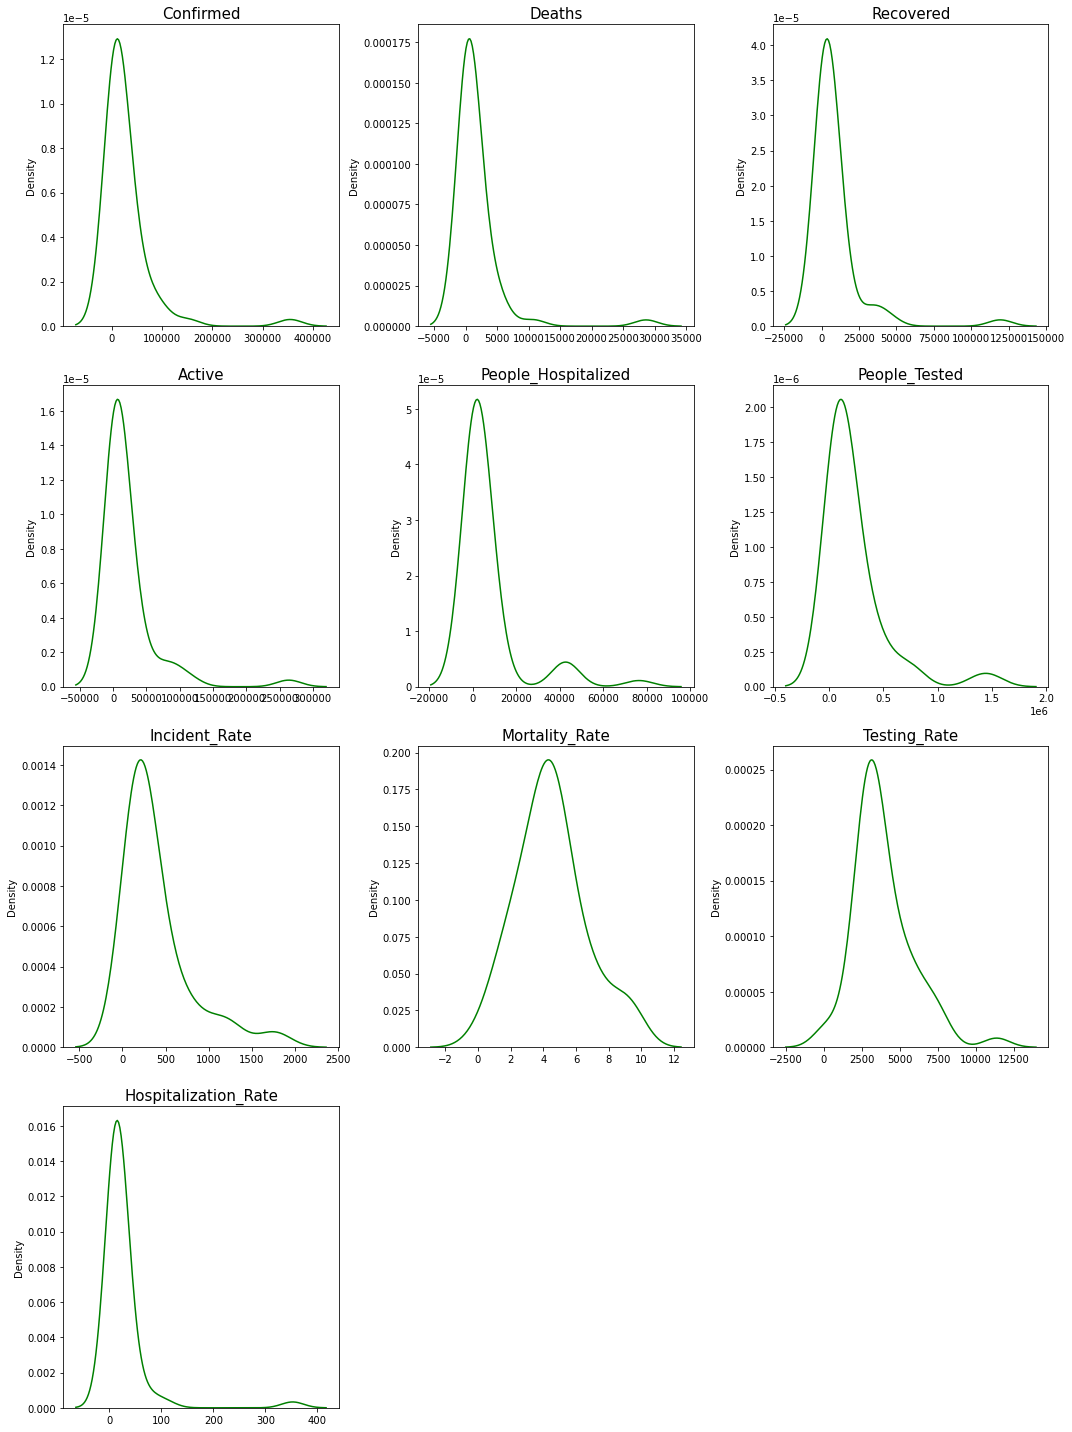

In [25]:
cols = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'People_Hospitalized', 'People_Tested', 'Incident_Rate', 'Mortality_Rate', 'Testing_Rate', 'Hospitalization_Rate']
plt.figure(figsize=(15,20))

for i in range(len(cols)):
    plt.subplot(4,3,i+1)
    ax = sns.distplot(x = df[cols[i]],hist=False,color='Green')
    ax.set_title(cols[i],fontsize=15)
    plt.tight_layout()

All columns are right skewed except Mortality_Rate and Hospitalization_Rate

### OUTLIER REMOVAL

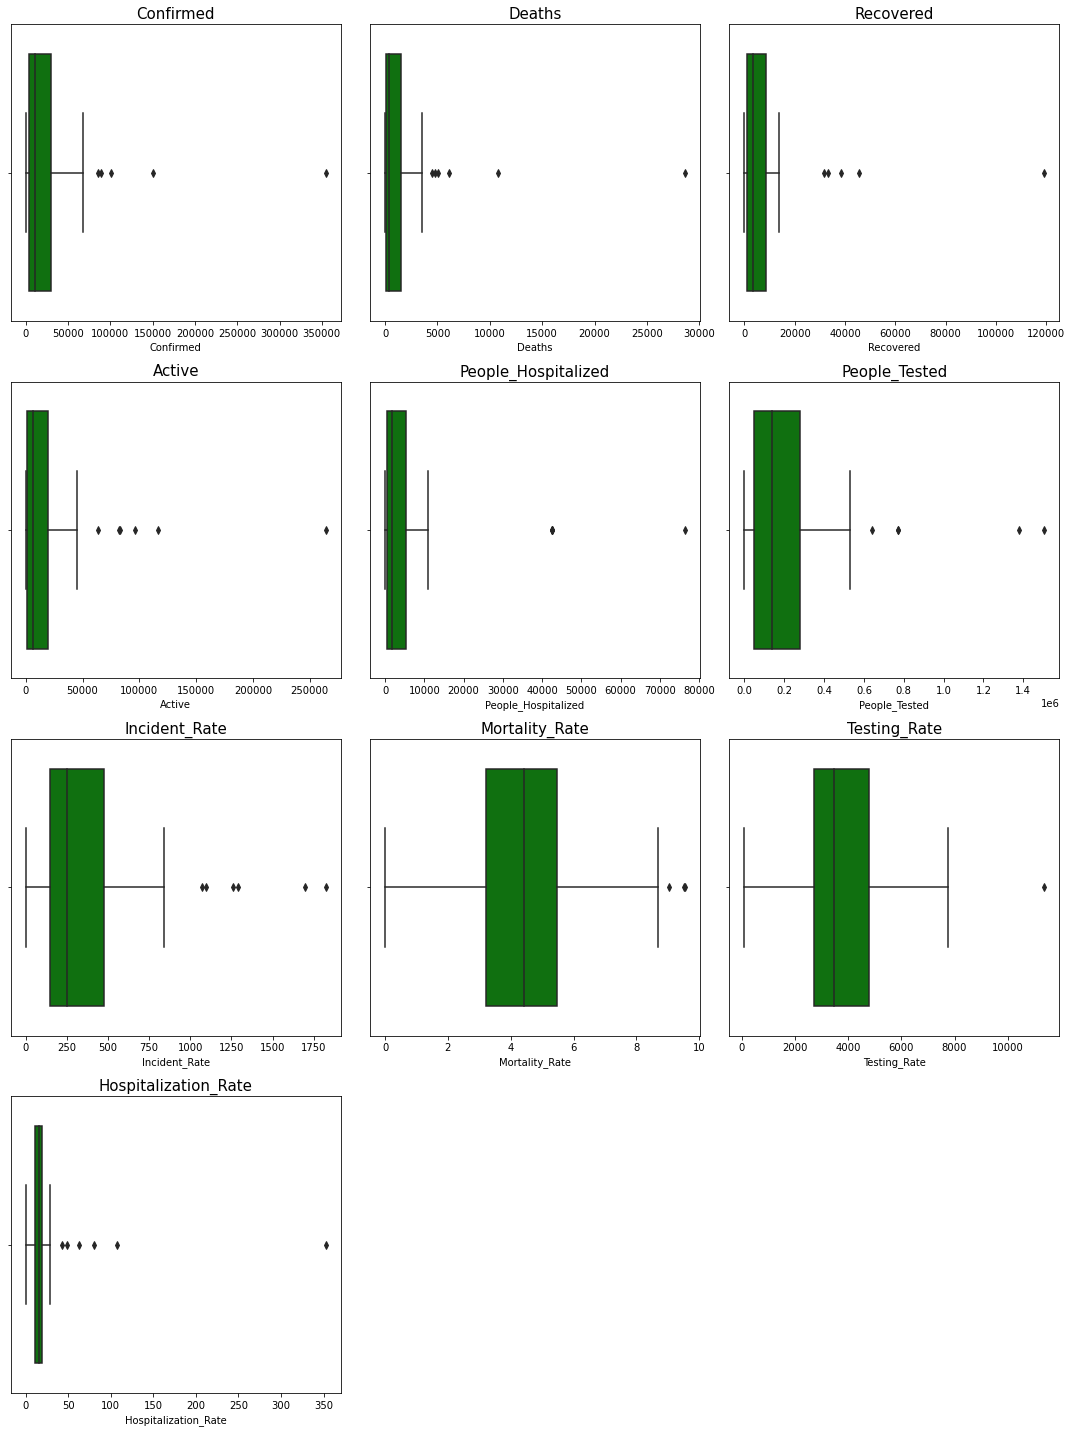

In [26]:
cols = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'People_Hospitalized', 'People_Tested', 'Incident_Rate', 'Mortality_Rate', 'Testing_Rate', 'Hospitalization_Rate']
plt.figure(figsize=(15,20))

for i in range(len(cols)):
    plt.subplot(4,3,i+1)
    ax = sns.boxplot(x = df[cols[i]],orient='h',color='Green')
    ax.set_title(cols[i],fontsize=15)
    plt.tight_layout()

All Columns except hospitalization rate have outliers

In [27]:
temp_df = df[cols]
threshold = 3
temp_df

,Confirmed,Deaths,Recovered,Active,People_Hospitalized,People_Tested,Incident_Rate,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,13052,522,1044.0,12530.0,1493.0,164450.0,266.194321,3.999387,3353.942386,11.438860
1,401,10,372.0,39.0,74.0,37045.0,54.815493,2.493766,5063.940017,18.453865
2,0,0,0.0,0.0,0.0,124.0,0.000000,0.000000,222.857246,0.000000
3,14906,747,5267.0,10386.0,1792.0,165435.0,204.788838,5.011405,2272.859351,12.022005
4,5003,107,4066.0,1044.0,535.0,96258.0,165.782801,2.138717,3189.670370,10.693584
5,85997,3497,6994.0,82500.0,9091.0,1380120.0,217.646575,4.066421,3492.893832,10.571299
6,22797,1299,6076.0,18020.0,3955.0,131837.0,395.868121,5.698118,2289.339188,17.348774
7,39017,3529,13322.0,29224.0,10946.0,190718.0,1094.357902,9.044775,5349.302875,28.054438
8,8194,310,4585.0,3919.0,1762.0,45412.0,841.476990,3.783256,4663.552976,21.503539
9,7551,407,1873.0,6085.0,1697.0,40419.0,1069.927127,5.390015,5727.106946,22.473845


In [28]:
from scipy.stats import zscore
z = np.abs(zscore(temp_df))
np.where(z>threshold)

(array([ 5, 32, 34, 34, 34, 34, 34, 34, 34, 37, 43], dtype=int64),
 array([5, 6, 0, 1, 2, 3, 4, 5, 6, 9, 8], dtype=int64))

In [29]:
df_new = df[(z<threshold).all(axis=1)]
df_new

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,1044.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,372.0,39.0,2,54.815493,37045.0,74.0,2.493766,84000002,USA,5063.940017,18.453865
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,0.0,0.0,60,0.000000,124.0,0.0,0.000000,16,ASM,222.857246,0.000000
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,5267.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,4066.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,6076.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,13322.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,4585.0,3919.0,10,841.476990,45412.0,1762.0,3.783256,84000010,USA,4663.552976,21.503539
9,District of Columbia,US,2020-05-21 02:32:54,38.8974,-77.0268,7551,407,1873.0,6085.0,11,1069.927127,40419.0,1697.0,5.390015,84000011,USA,5727.106946,22.473845
10,Florida,US,2020-05-21 02:32:54,27.7663,-81.6868,47471,2096,4192.0,45375.0,12,221.024217,771348.0,8934.0,4.415327,84000012,USA,3591.383953,18.819911


In [30]:
#Percentage of data lost
((len(df)-len(df_new))/len(df))*100

8.928571428571429

Percentage of data lost more than 5%. Therefore we try using IQR method

In [31]:
q1 = temp_df.quantile(0.25)
q3 = temp_df.quantile(0.75)
iqr = q3-q1

In [32]:
df_new1 = df[~ ( (temp_df<(q1-1.5*iqr)) | (temp_df>(q3+1.5*iqr)) ).any(axis=1)]
df_new1.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,1044.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,372.0,39.0,2,54.815493,37045.0,74.0,2.493766,84000002,USA,5063.940017,18.453865
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,0.0,0.0,60,0.000000,124.0,0.0,0.000000,16,ASM,222.857246,0.000000
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,5267.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,4066.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [33]:
#Percentage of data lost
((len(df)-len(df_new1))/len(df))*100

28.57142857142857

Percentage of data lost is more than 5%.
Since the dataset is very small we proceed further without removing the outliers

### BIVARIATE ANALYSIS

#### STATE VS EACH VARIABLE

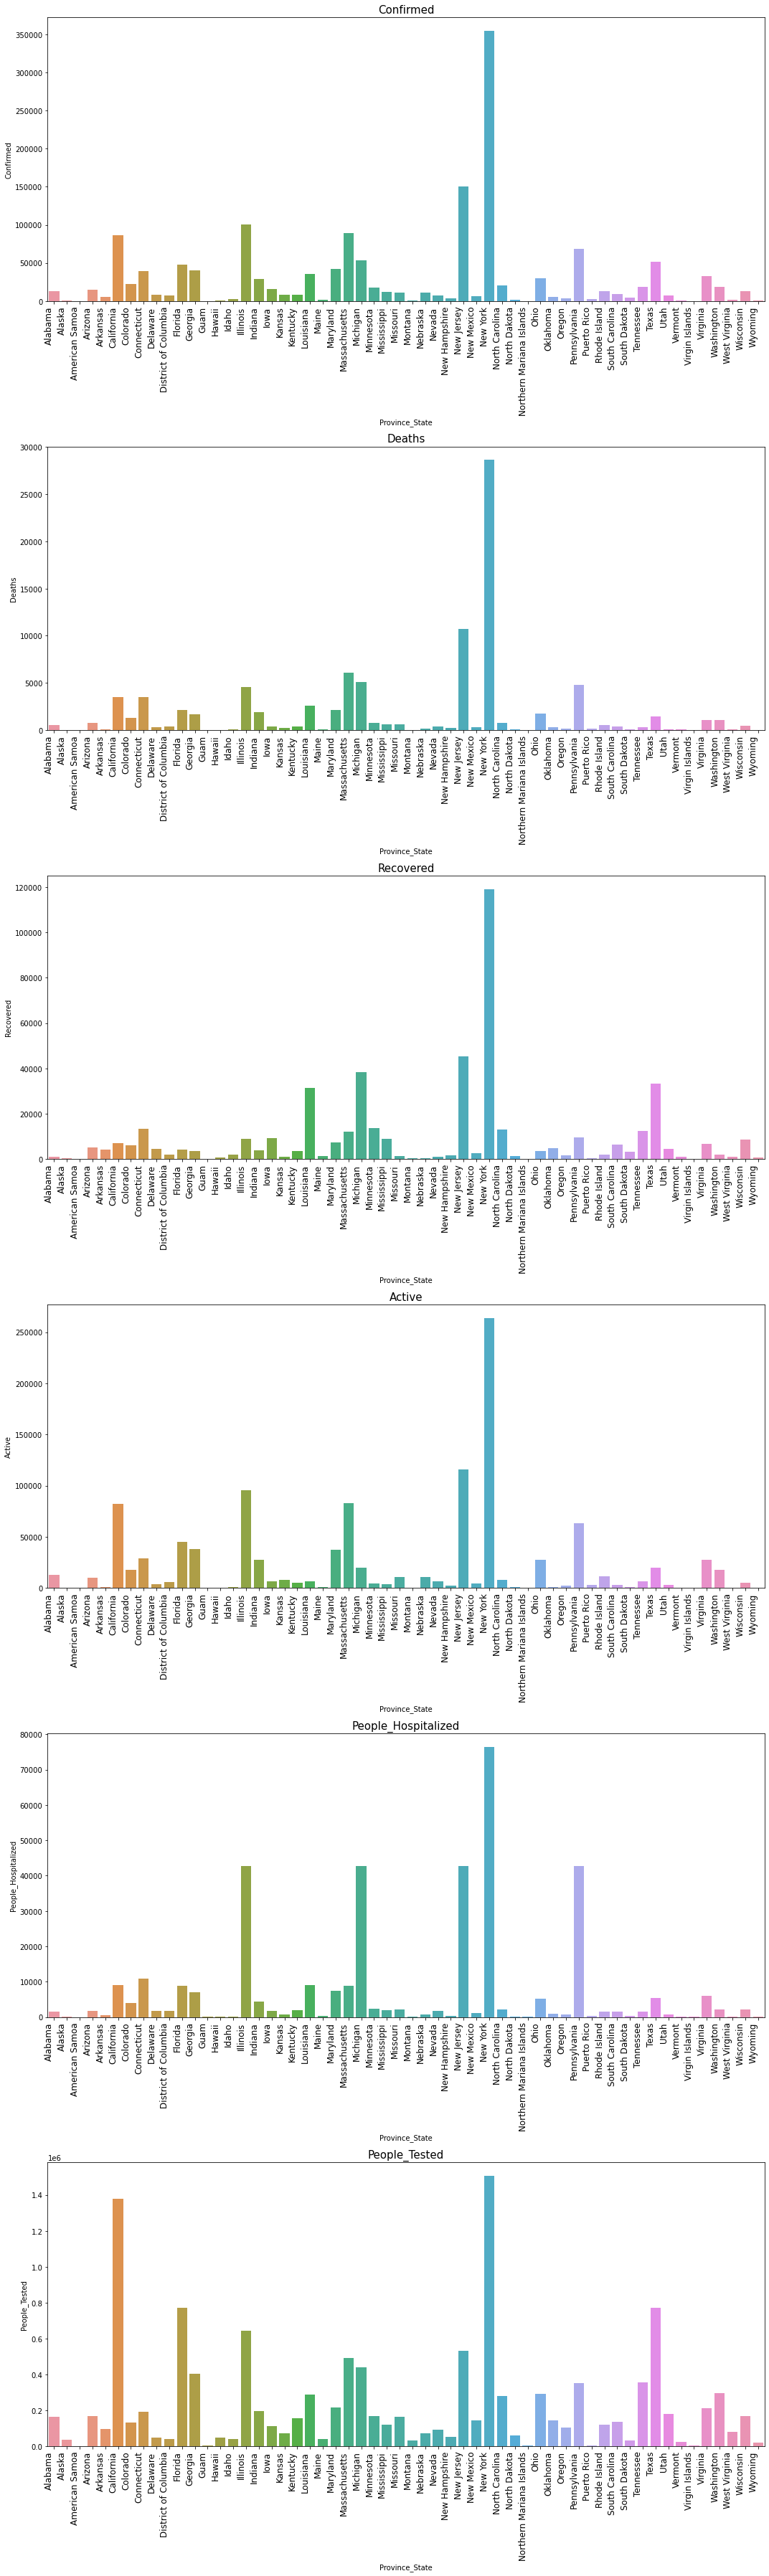

In [34]:
cols = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'People_Hospitalized', 'People_Tested']
plt.figure(figsize=(15,50))

for i in range(len(cols)):
    plt.subplot(6,1,i+1)
    ax = sns.barplot(x = df['Province_State'], y = df[cols[i]])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=12)
    ax.set_title(cols[i],fontsize=15)
    plt.tight_layout()

* New York is the worst affected Province_State and is leading in all categories
* American Samoa is the least affected Province_State

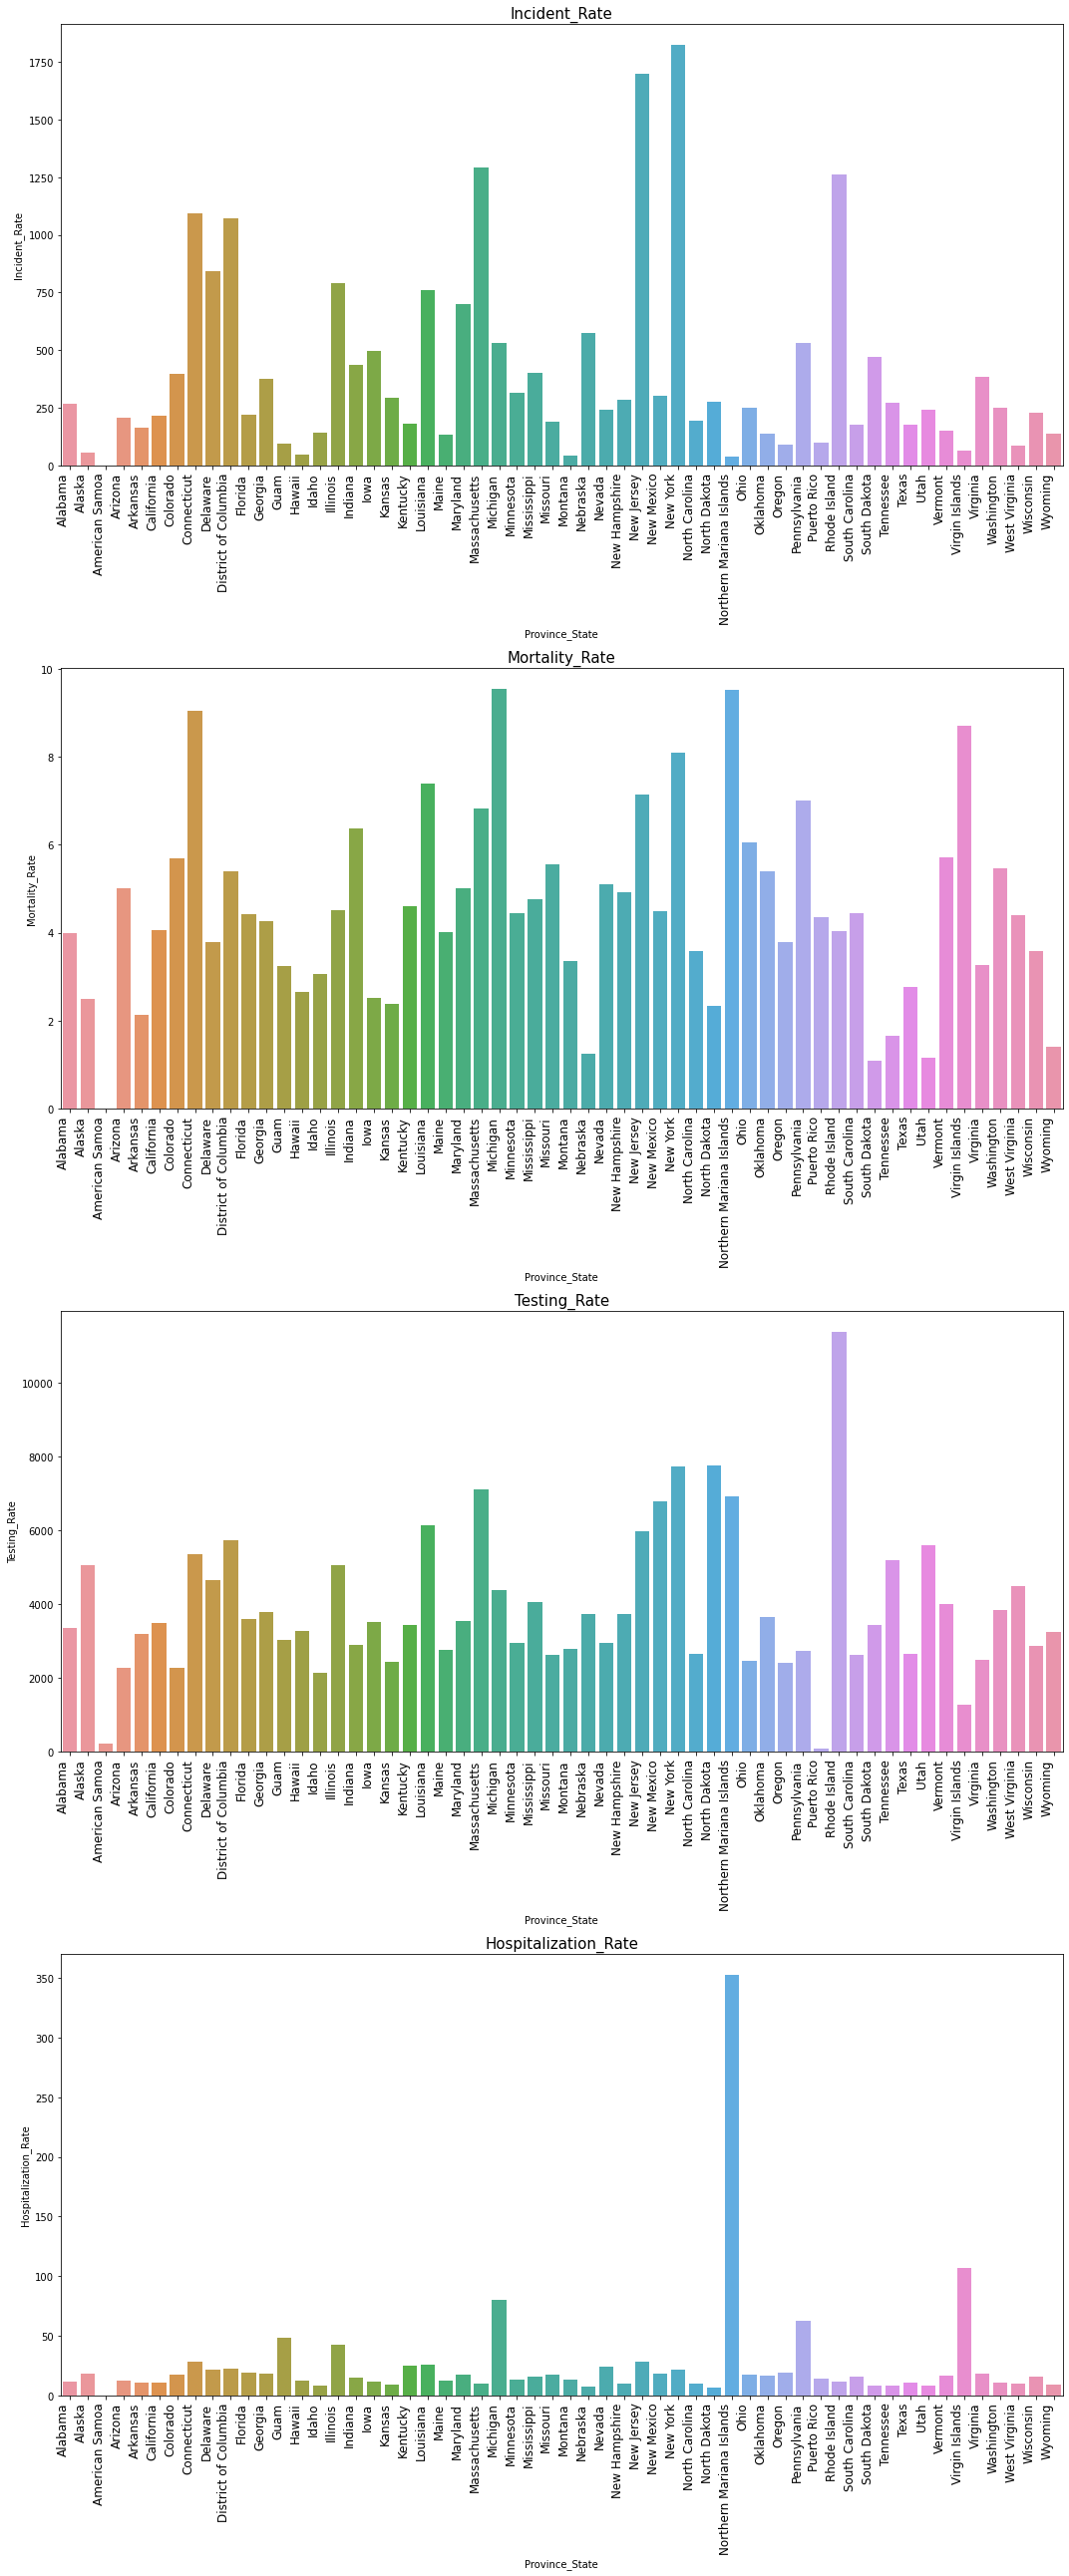

In [35]:
rates =['Incident_Rate', 'Mortality_Rate', 'Testing_Rate', 'Hospitalization_Rate']
plt.figure(figsize=(15,36))

for i in range(len(rates)):
    plt.subplot(4,1,i+1)
    ax = sns.barplot(x = df['Province_State'], y = df[rates[i]])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=12)
    ax.set_title(rates[i],fontsize=15)
    plt.tight_layout()

* Incident_Rate is highest in New York
* Mortality_Rate is highest in Massachuaetts and Northern Marina Islands
* Testing_Rate is highest in Rhode Island
* Hospitalization_Rate is highest in Connecticut

### FEATURE SELECTION

* We can remove FIPS(Unique for each state), Country_Region(Since entire dataset is taken from one country), Last Update can also be dropped since the entire dataset is taken for one day, UID, ISO3
* We can either keep Province_State or we can use Lat and Long_

In [36]:
df.drop(['FIPS','Country_Region','Last_Update','Lat','Long_','UID','ISO3'],axis=1,inplace=True)
df.head()

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,Alabama,13052,522,1044.0,12530.0,266.194321,164450.0,1493.0,3.999387,3353.942386,11.438860
1,Alaska,401,10,372.0,39.0,54.815493,37045.0,74.0,2.493766,5063.940017,18.453865
2,American Samoa,0,0,0.0,0.0,0.000000,124.0,0.0,0.000000,222.857246,0.000000
3,Arizona,14906,747,5267.0,10386.0,204.788838,165435.0,1792.0,5.011405,2272.859351,12.022005
4,Arkansas,5003,107,4066.0,1044.0,165.782801,96258.0,535.0,2.138717,3189.670370,10.693584


### LABEL ENCODING

In [37]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Province_State'] = label_encoder.fit_transform(df['Province_State'])
df.head()

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,0,13052,522,1044.0,12530.0,266.194321,164450.0,1493.0,3.999387,3353.942386,11.438860
1,1,401,10,372.0,39.0,54.815493,37045.0,74.0,2.493766,5063.940017,18.453865
2,2,0,0,0.0,0.0,0.000000,124.0,0.0,0.000000,222.857246,0.000000
3,3,14906,747,5267.0,10386.0,204.788838,165435.0,1792.0,5.011405,2272.859351,12.022005
4,4,5003,107,4066.0,1044.0,165.782801,96258.0,535.0,2.138717,3189.670370,10.693584


### CORRELATION

<AxesSubplot:>

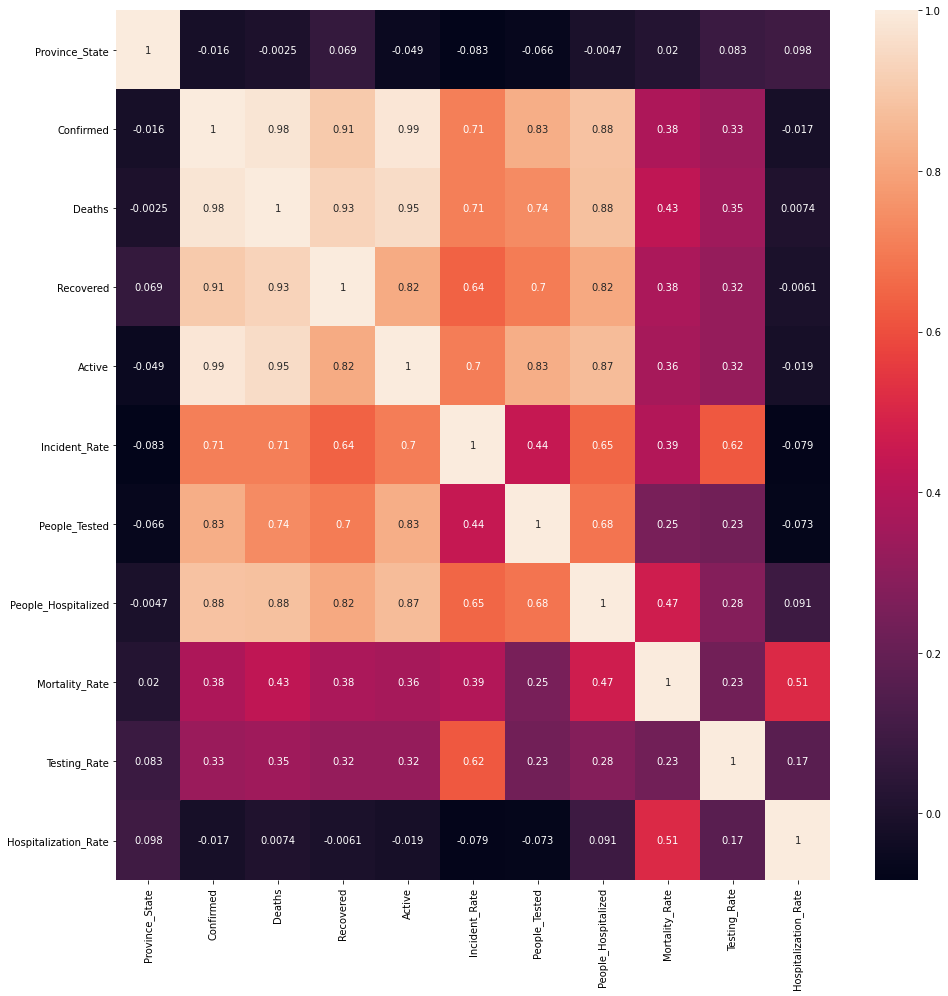

In [38]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),annot=True)

* The column deaths has a positive correlation with all the columns
* It is very strongly correlated with Confirmed, Active and Recovered

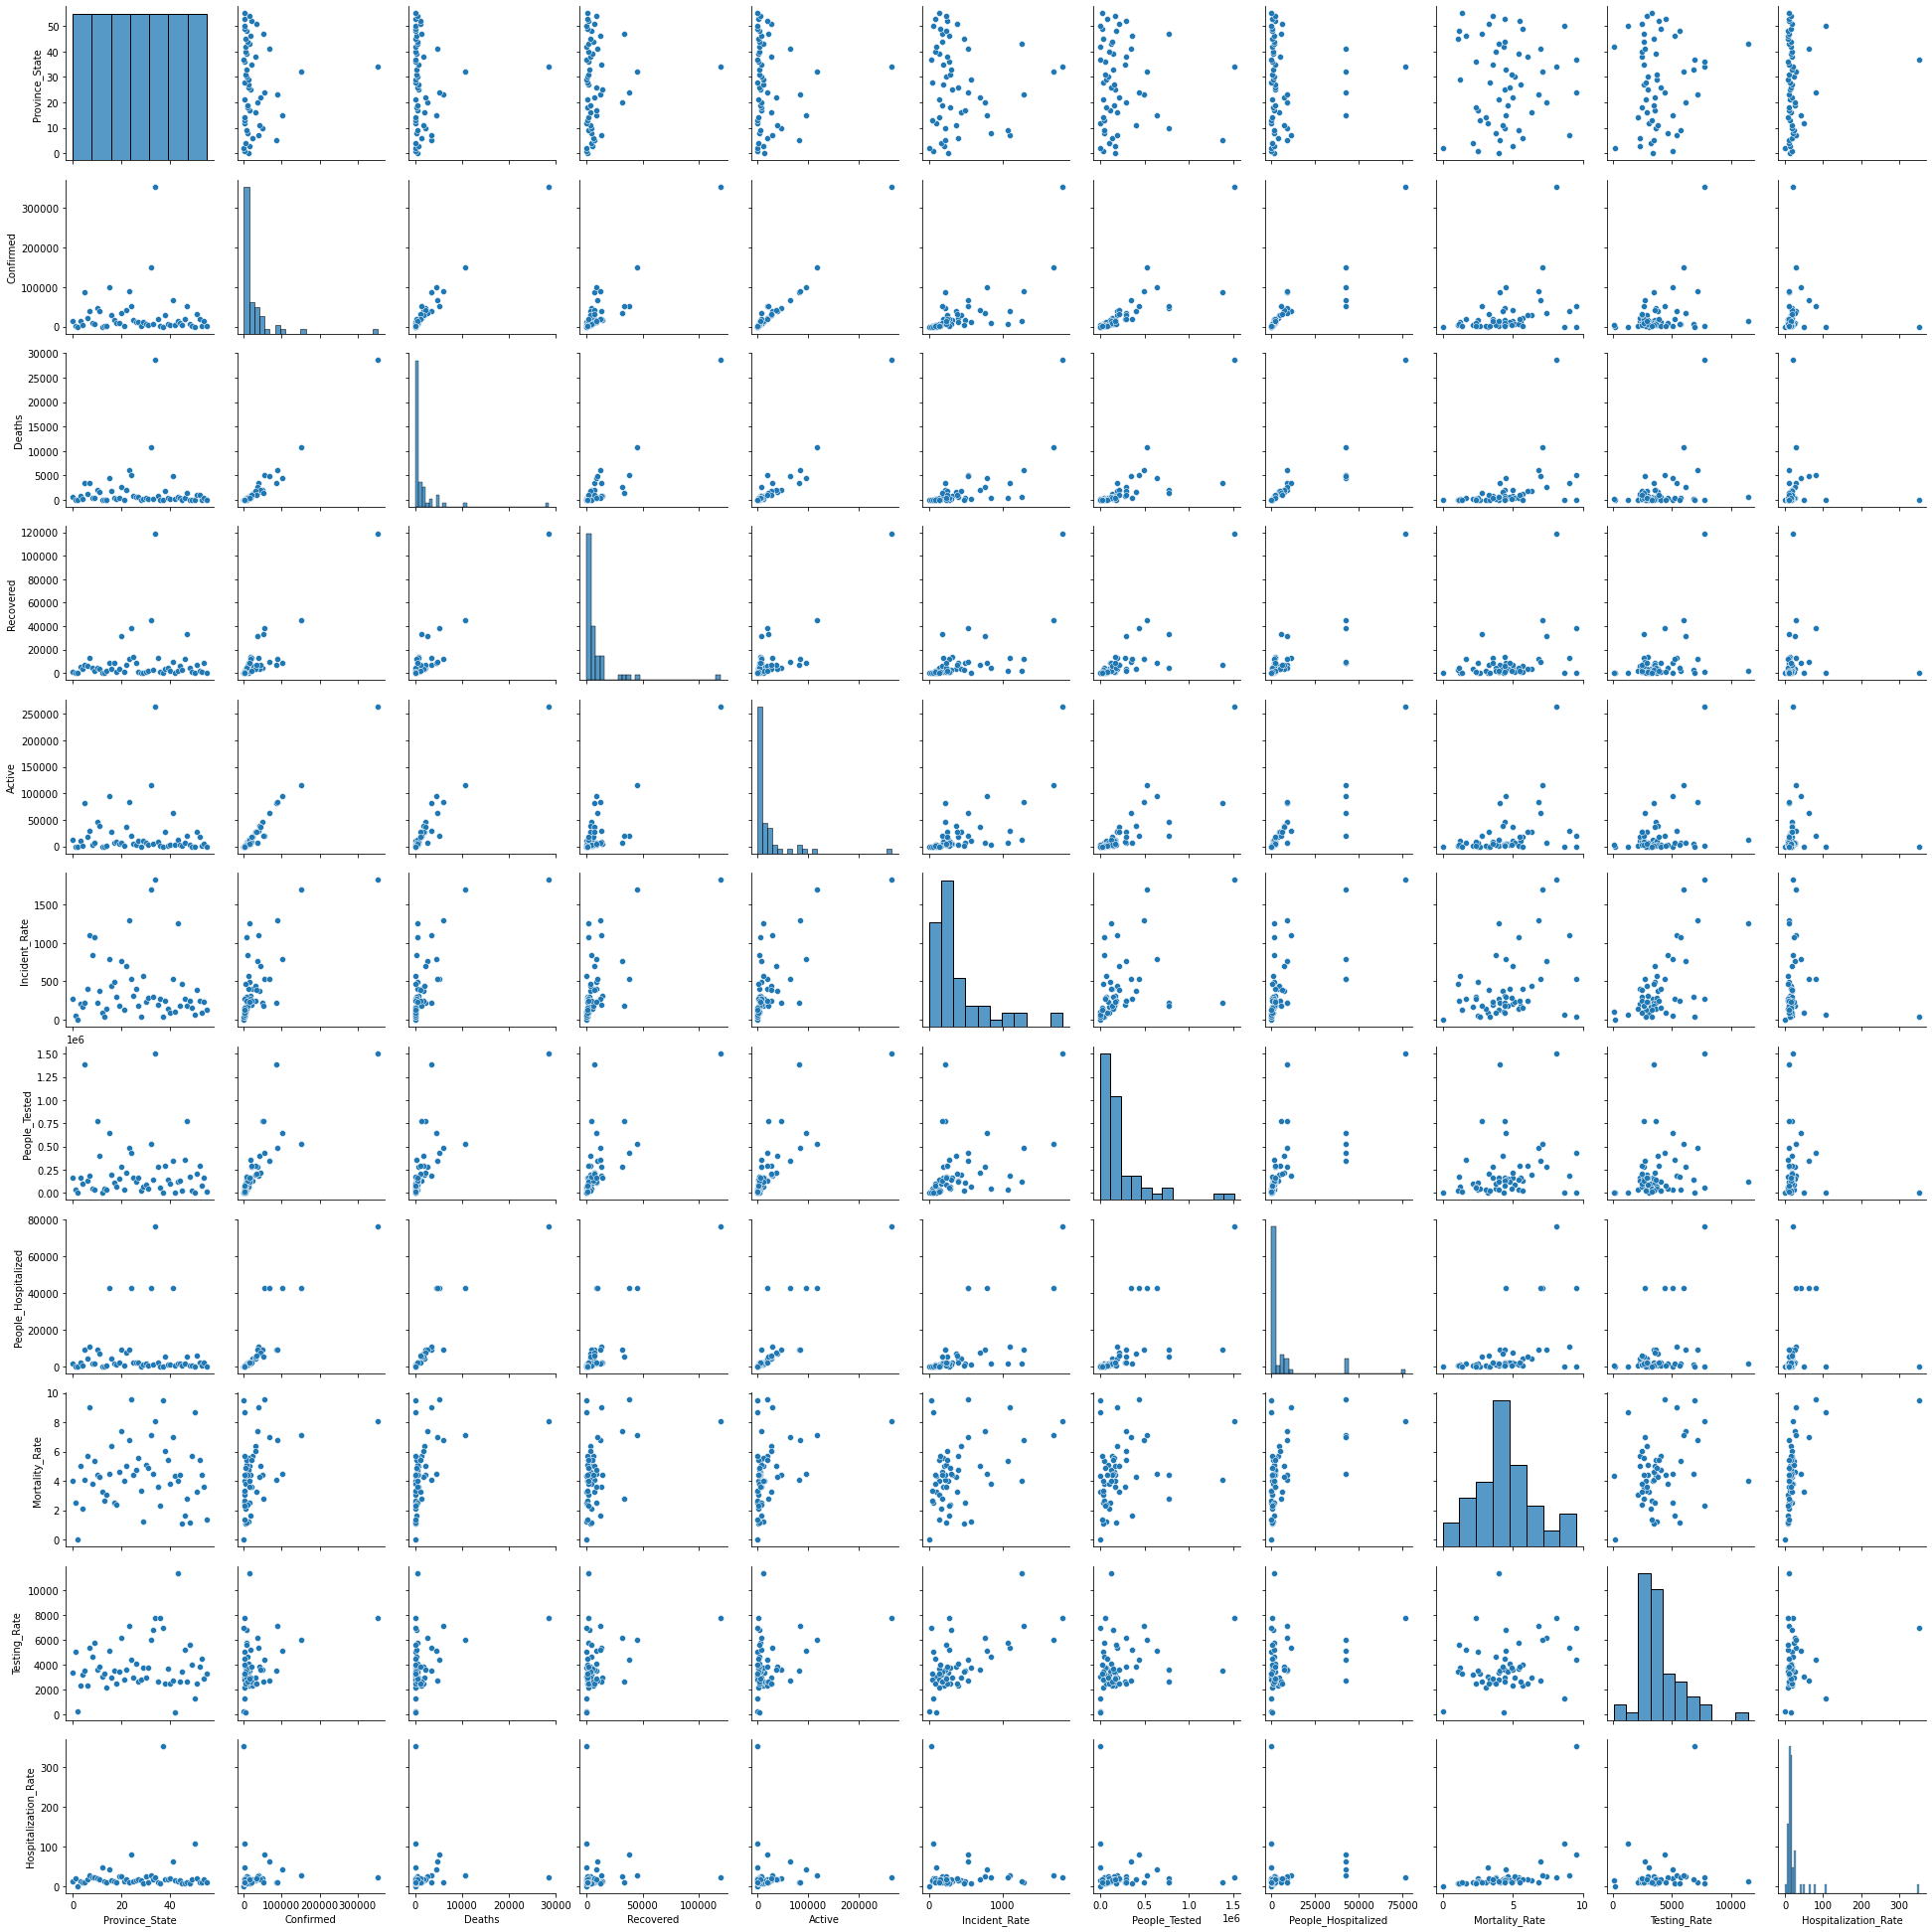

In [39]:
sns.pairplot(df)

In [40]:
x = df.drop('Deaths',axis=1)
y = df['Deaths']
x.columns

Index(['Province_State', 'Confirmed', 'Recovered', 'Active', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

### REMOVING SKEWNESS

In [41]:
df.skew()

Province_State          0.000000
Confirmed               4.646063
Deaths                  5.404018
Recovered               4.839241
Active                  4.116348
Incident_Rate           1.955650
People_Tested           2.783163
People_Hospitalized     3.284562
Mortality_Rate          0.462024
Testing_Rate            1.291806
Hospitalization_Rate    6.097768
dtype: float64

In [42]:
from sklearn.preprocessing import power_transform
transf = pd.DataFrame(power_transform(x[['Confirmed', 'Recovered', 'Active', 'Incident_Rate','People_Tested', 'People_Hospitalized', 'Mortality_Rate','Testing_Rate', 'Hospitalization_Rate']],method='yeo-johnson'))
transf.rename({0: 'Confirmed', 1: 'Recovered', 2: 'Active', 3: 'Incident_Rate', 4: 'People_Tested', 5: 'People_Hospitalized', 6: 'Mortality_Rate',7: 'Testing_Rate', 8: 'Hospitalization_Rate' }, axis=1, inplace = True)
x.drop(['Confirmed', 'Recovered', 'Active', 'Incident_Rate','People_Tested', 'People_Hospitalized', 'Mortality_Rate','Testing_Rate', 'Hospitalization_Rate'],axis=1 ,inplace=True)
x = pd.concat((x, transf), axis=1)

### MODEL BUILDING

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_t = sc.fit_transform(x)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
models = {
    "Linear Regression" : {'model':LinearRegression(),
                           'params':{}
                          }, 
    "Ridge" : {'model':Ridge(),
               'params':{'alpha':[200, 250, 275, 300, 500]}
              }, 
    "Decision Tree" : {'model':DecisionTreeRegressor(),
                       'params':{'max_depth' : [5],
                                 'min_samples_leaf' : [50,100,150,200]
                                }
                      },
    "Random Forest" : {'model':RandomForestRegressor(),
                       'params':{'n_estimators':[100,150],
                                 'max_depth':[5,8,50,100,150,200], 
                                 'min_samples_leaf':[1,2,3,5,10]
                                }
                      },
    "K Nearest Neighbors" : {'model':KNeighborsRegressor(),
                             'params':{'n_neighbors':[5,10,15],
                                       'weights':['uniform','distance'],
                                       'metric':['euclidean','manhattan']
                                      }
                            }
}

In [44]:
max_scr = 0

for r_s in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_t,y,random_state=r_s,test_size=0.20)
    for i,j in models.items():
        j['model'].fit(x_train,y_train)
        pred_test = j['model'].predict(x_test)
        r2 = r2_score(y_test,pred_test)
        if r2 > max_scr:
            max_scr = r2
            best_model = j['model']
            best_r_s = r_s
print("Model : ",best_model)
print("Score : ",max_scr)
print("Random State : ",r_s)
            

Model :  KNeighborsRegressor()
Score :  0.9944595100556615
Random State :  999


### RANDOM FOREST REGRESSOR IS THE BEST MODEL WITH A R2 SCORE OF 0.99

In [45]:
from sklearn.model_selection import GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x_t,y,random_state=999,test_size=0.20)
grid = GridSearchCV(models['Random Forest']['model'], models['Random Forest']['params'], cv=4, scoring = 'r2')
grid.fit(x_train,y_train)
print({
    'model': 'Random Forest',
    'best_score' : np.sqrt(np.abs(grid.best_score_)),
    'best_params' : grid.best_params_
})

{'model': 'Random Forest', 'best_score': 0.8469839067804747, 'best_params': {'max_depth': 50, 'min_samples_leaf': 1, 'n_estimators': 100}}


In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
random_forest = RandomForestRegressor(max_depth=50, min_samples_leaf=1, n_estimators=100)
random_forest.fit(x_train,y_train)
y_pred = random_forest.predict(x_test)
print('R2 Score : ',r2_score(y_test,y_pred))
print('RMSE Score : ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MSE Score : ',mean_squared_error(y_test,y_pred))
print('RMAE Score : ',np.sqrt(mean_absolute_error(y_test,y_pred)))

R2 Score :  0.9760707954838055
RMSE Score :  200.77141631301333
MSE Score :  40309.161608333314
RMAE Score :  12.465184849545286


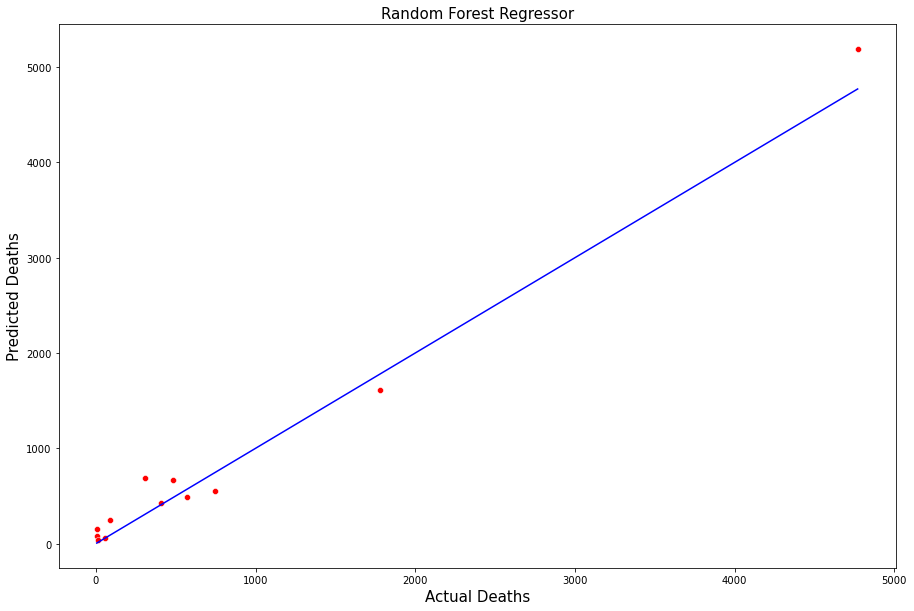

In [47]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(y_test,y_pred,color='r')
ax = sns.lineplot(y_test,y_test,color='b')
ax.set_xlabel('Actual Deaths',fontsize=15)
ax.set_ylabel('Predicted Deaths',fontsize=15)
ax.set_title('Random Forest Regressor',fontsize=15)
plt.show()

In [48]:
import joblib
joblib.dump(random_forest,"Covid 19_USA_Random_forest_regressor.pkl")

['Covid 19_USA_Random_forest_regressor.pkl']